# Tabular Kaggle Project

Guideline for steps for the Kaggle Tabular Project. You will "turn in" a GitHub repository, modeled after [Project Template](https://github.com/UTA-DataScience/ProjectTempate) on the day of the final, May 3rd 1:30 pm. During the final period we will have about 5 minutes to go over your project and your results.

You can find a list of possible Tabular datasets here on [Excel File in Teams](https://mavsuta.sharepoint.com/:x:/r/sites/Course_2242_data_3402_001-vUhPXzAGLgTnk/Shared%20Documents/General/TabularDatasets.xlsx?d=w17e157db75904dfcb03a78c84f10e2e6&csf=1&web=1&e=KHi7m9). You are not limited to these datasets. If you find a Kaggle challenge not listed that you would like to attempt, please go check with Dr. Farbin to make sure it is viable.

This notebook outlines the steps you shoud follow. The file(s) in the GitHub repository should contain these steps. Note that you will be only considering classification projects.

## Define Project

* Provide Project link.
* Short paragraph describing the challenge. 
* Briefly describe the data.


Project link: [blue_text](https://www.kaggle.com/competitions/widsdatathon2024-challenge1/overview)

Challenge Description: The challenge is to use the given training data to train a model that can successfully predict whether a patient is diagnosed with metastatic cancer within 90 days if screening. In order to successfully train the model, the dataset needs to be cleaned and the best features for finding success/failure need to be separated from the rest. 

Data Description: The data contains 83 features describing 12,906 different patients and whether or not they were diagnosed with metastatic cancer within 90 days of screening. The features contain information regarding the patients' ages, locations, cancer codes, race, etc. 

## Data Loading and Initial Look

* Load the data. 
* Count the number of rows (data points) and features.
* Any missing values? 
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate
from sklearn.metrics import roc_curve, auc, precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [185]:
file='training.csv'
TRAIN=pd.read_csv(file)

In [186]:
TRAIN.head(3)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1


In [8]:
TRAIN.shape

# 12906 rows
# 83 features/columns

(12906, 83)

In [214]:
for feat in TRAIN:
    print(f'{feat}:', TRAIN[feat].isnull().sum()) # Number of null values for each feature

patient_id: 0
patient_race: 6385
payer_type: 1803
patient_state: 51
patient_zip3: 0
patient_age: 0
patient_gender: 0
bmi: 8965
breast_cancer_diagnosis_code: 0
breast_cancer_diagnosis_desc: 0
metastatic_cancer_diagnosis_code: 0
metastatic_first_novel_treatment: 12882
metastatic_first_novel_treatment_type: 12882
Region: 52
Division: 52
population: 1
density: 1
age_median: 1
age_under_10: 1
age_10_to_19: 1
age_20s: 1
age_30s: 1
age_40s: 1
age_50s: 1
age_60s: 1
age_70s: 1
age_over_80: 1
male: 1
female: 1
married: 1
divorced: 1
never_married: 1
widowed: 1
family_size: 4
family_dual_income: 4
income_household_median: 4
income_household_under_5: 4
income_household_5_to_10: 4
income_household_10_to_15: 4
income_household_15_to_20: 4
income_household_20_to_25: 4
income_household_25_to_35: 4
income_household_35_to_50: 4
income_household_50_to_75: 4
income_household_75_to_100: 4
income_household_100_to_150: 4
income_household_150_over: 4
income_household_six_figure: 4
income_individual_median: 1


In [6]:
table=[]
filtered=TRAIN.dropna() # Remove the null values temporarily to find unique values of categorical variables
for feat in TRAIN:
    cat=False
    properties=[] # list to store the properties of the feature
    properties.append(feat) # add the name of the feature
    if isinstance(filtered[feat].tolist()[0], int)==False and isinstance(filtered[feat].tolist()[0], float)==False:
        properties.append('Categorical')  
        cat=True
    elif isinstance(filtered[feat].tolist()[0], int) and len(set(TRAIN[feat].dropna().tolist()))<10:
        properties.append('Categorical')  
        cat=True
    else: properties.append('Numerical') # Define feature as categorical or numerical
    properties.append(len(TRAIN[TRAIN[feat].isnull()==True])) # Number of null values
    properties.append(set(TRAIN[feat].dropna().tolist()) if cat else f'{TRAIN[feat].dropna().min()} to {TRAIN[feat].dropna().max()}')
    table.append(properties)
tabulate.tabulate(table, tablefmt='html', headers=['Feature', 'Data Type', '# of Null Values', 'Values'])


Feature,Data Type,# of Null Values,Values
patient_id,Numerical,0,100063 to 999896
patient_race,Categorical,6385,"{'Hispanic', 'White', 'Asian', 'Other', 'Black'}"
payer_type,Categorical,1803,"{'MEDICARE ADVANTAGE', 'COMMERCIAL', 'MEDICAID'}"
patient_state,Categorical,51,"{'CT', 'KS', 'WV', 'TN', 'WI', 'SC', 'NY', 'ND', 'NJ', 'MO', 'OK', 'WA', 'IA', 'AK', 'MN', 'PR', 'CO', 'NH', 'MD', 'MI', 'FL', 'GA', 'UT', 'IL', 'RI', 'DE', 'WY', 'OR', 'TX', 'NM', 'HI', 'SD', 'MT', 'NE', 'AR', 'LA', 'AZ', 'NV', 'CA', 'AL', 'VA', 'IN', 'MA', 'MS', 'KY', 'OH', 'DC', 'ID', 'NC', 'PA'}"
patient_zip3,Numerical,0,101 to 999
patient_age,Numerical,0,18 to 91
patient_gender,Categorical,0,{'F'}
bmi,Numerical,8965,14.0 to 85.0
breast_cancer_diagnosis_code,Categorical,0,"{'C50219', 'C50412', 'C5031', 'C50512', 'C50312', '1742', 'C50819', 'C50421', '1749', '1743', '1748', '1746', 'C50912', 'C50519', 'C50811', '1759', '1745', '1744', 'C5091', 'C50', 'C50419', 'C50911', 'C50812', 'C50511', 'C50012', 'C50019', 'C50411', 'C50111', 'C50021', 'C50211', 'C50311', 'C5051', 'C50929', 'C50611', 'C5001', 'C50619', 'C5041', '1741', '19881', 'C50919', 'C50612', 'C50119', 'C50112', 'C5011', 'C50319', 'C509', 'C5021', 'C50212', 'C5081', 'C50011'}"
breast_cancer_diagnosis_desc,Categorical,0,"{'Malignant neoplasm of breast', 'Malignant neoplasm of other and unspecified sites of male breast', 'Malignant neoplasm of unsp site of unspecified female breast', 'Malignant neoplasm of other specified sites of female breast', 'Malignant neoplasm of lower-outer quadrant of female breast', 'Malignant neoplasm of lower-outer quadrant of breast, female', 'Secondary malignant neoplasm of breast', 'Malignant neoplasm of nipple and areola, female', 'Malig neoplasm of lower-outer quadrant of unsp female breast', 'Malignant neoplasm of lower-inner quadrant of female breast', 'Malignant neoplasm of central portion of left female breast', 'Malig neoplm of lower-inner quadrant of right female breast', 'Malignant neoplasm of unspecified site of left female breast', 'Malignant neoplasm of ovrlp sites of left female breast', 'Malignant neoplasm of axillary tail of female breast', 'Malignant neoplasm of upper-inner quadrant of breast, female', 'Malignant neoplasm of axillary tail of right female breast', 'Malig neoplasm of lower-outer quadrant of left female breast', 'Malignant neoplasm of unsp site of unspecified male breast', 'Malig neoplasm of upper-inner quadrant of unsp female breast', 'Malignant neoplasm of breast of unspecified site', 'Malignant neoplasm of central portion of breast, female', 'Malig neoplm of lower-outer quadrant of right female breast', 'Malignant neoplasm of lower-inner quadrant of breast, female', 'Malignant neoplasm of breast of unspecified site, female', 'Malignant neoplasm of axillary tail of left female breast', 'Malignant neoplasm of upper-outer quadrant of breast, female', 'Malignant neoplasm of nipple and areola, right female breast', 'Malignant neoplasm of central portion of right female breast', 'Malignant neoplasm of nipple and areola, left female breast', 'Malig neoplasm of lower-inner quadrant of unsp female breast', 'Malig neoplasm of upper-outer quadrant of left female breast', 'Malig neoplasm of upper-inner quadrant of left female breast', 'Malig neoplasm of upper-outer quadrant of unsp female breast', 'Malignant neoplasm of upper-inner quadrant of female breast', 'Malignant neoplasm of ovrlp sites of unsp female breast', 'Malig neoplasm of upper-outer quadrant of right male breast', 'Malignant neoplasm of upper-outer quadrant of female breast', 'Malignant neoplasm of central portion of female breast', 'Malignant neoplasm of ovrlp sites of right female breast', 'Malignant neoplasm of axillary tail of unsp female breast', 'Malignant neoplasm of nipple and areola, unsp female breast', 'Malignant neoplasm of nipple and areola, right male breast', 'Malignant neoplasm of central portion of unsp female breast', 'Malig neoplm of upper-outer quadrant of right fem

In [217]:
TRAIN_s=TRAIN[TRAIN['DiagPeriodL90D']==1]
TRAIN_f=TRAIN[TRAIN['DiagPeriodL90D']==0]
# Ratio of Success to Failure for the target feature

# The target is 'DiagPeriodL90D'
# The target is encoded as 1 (success) and 0 (failure)
# There is an imbalance: more success than failure

print('Success:',len(TRAIN_s),'\nFail:', len(TRAIN_f))

Success: 8060 
Fail: 4846


for feat in TRAIN:
    plt.figure()
    plt.hist(TRAIN_s[feat].dropna(), bins=100, histtype='step', label='success', stacked=True)
    plt.hist(TRAIN_f[feat].dropna(), bins=100, histtype='step', label='fail', stacked=True)
    plt.title(feat)
    plt.show()

## Data Visualization

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

In [187]:
import math
import scipy

def compare_features(df, target, logscale=False):
    df_0=df[df[target]==0]
    df_1=df[df[target]==1]

    n=df.shape[1]
    X=math.ceil(math.sqrt(n))
    Y=math.floor(math.sqrt(n))
    if X*Y<n: Y+=1

    plt.figure(figsize=(50,50))

    for i,col in enumerate(df):
        KS_test=scipy.stats.kstest(df_0[col],df_1[col]).statistic
        KS_test_str="{KS:.3f}".format(KS=KS_test)
        
        plt.subplot(X,Y,i+1)
        plt.title(col +': '+ KS_test_str)
        if logscale: plt.yscale('log')
        plt.hist(df_1[col].dropna(), bins=100, histtype='step', label='success', stacked=True)
        plt.hist(df_0[col].dropna(), bins=100, histtype='step', label='fail', stacked=True)

# Creates plots comparing the number of success and failures for each feature where blue is success and orange is failure

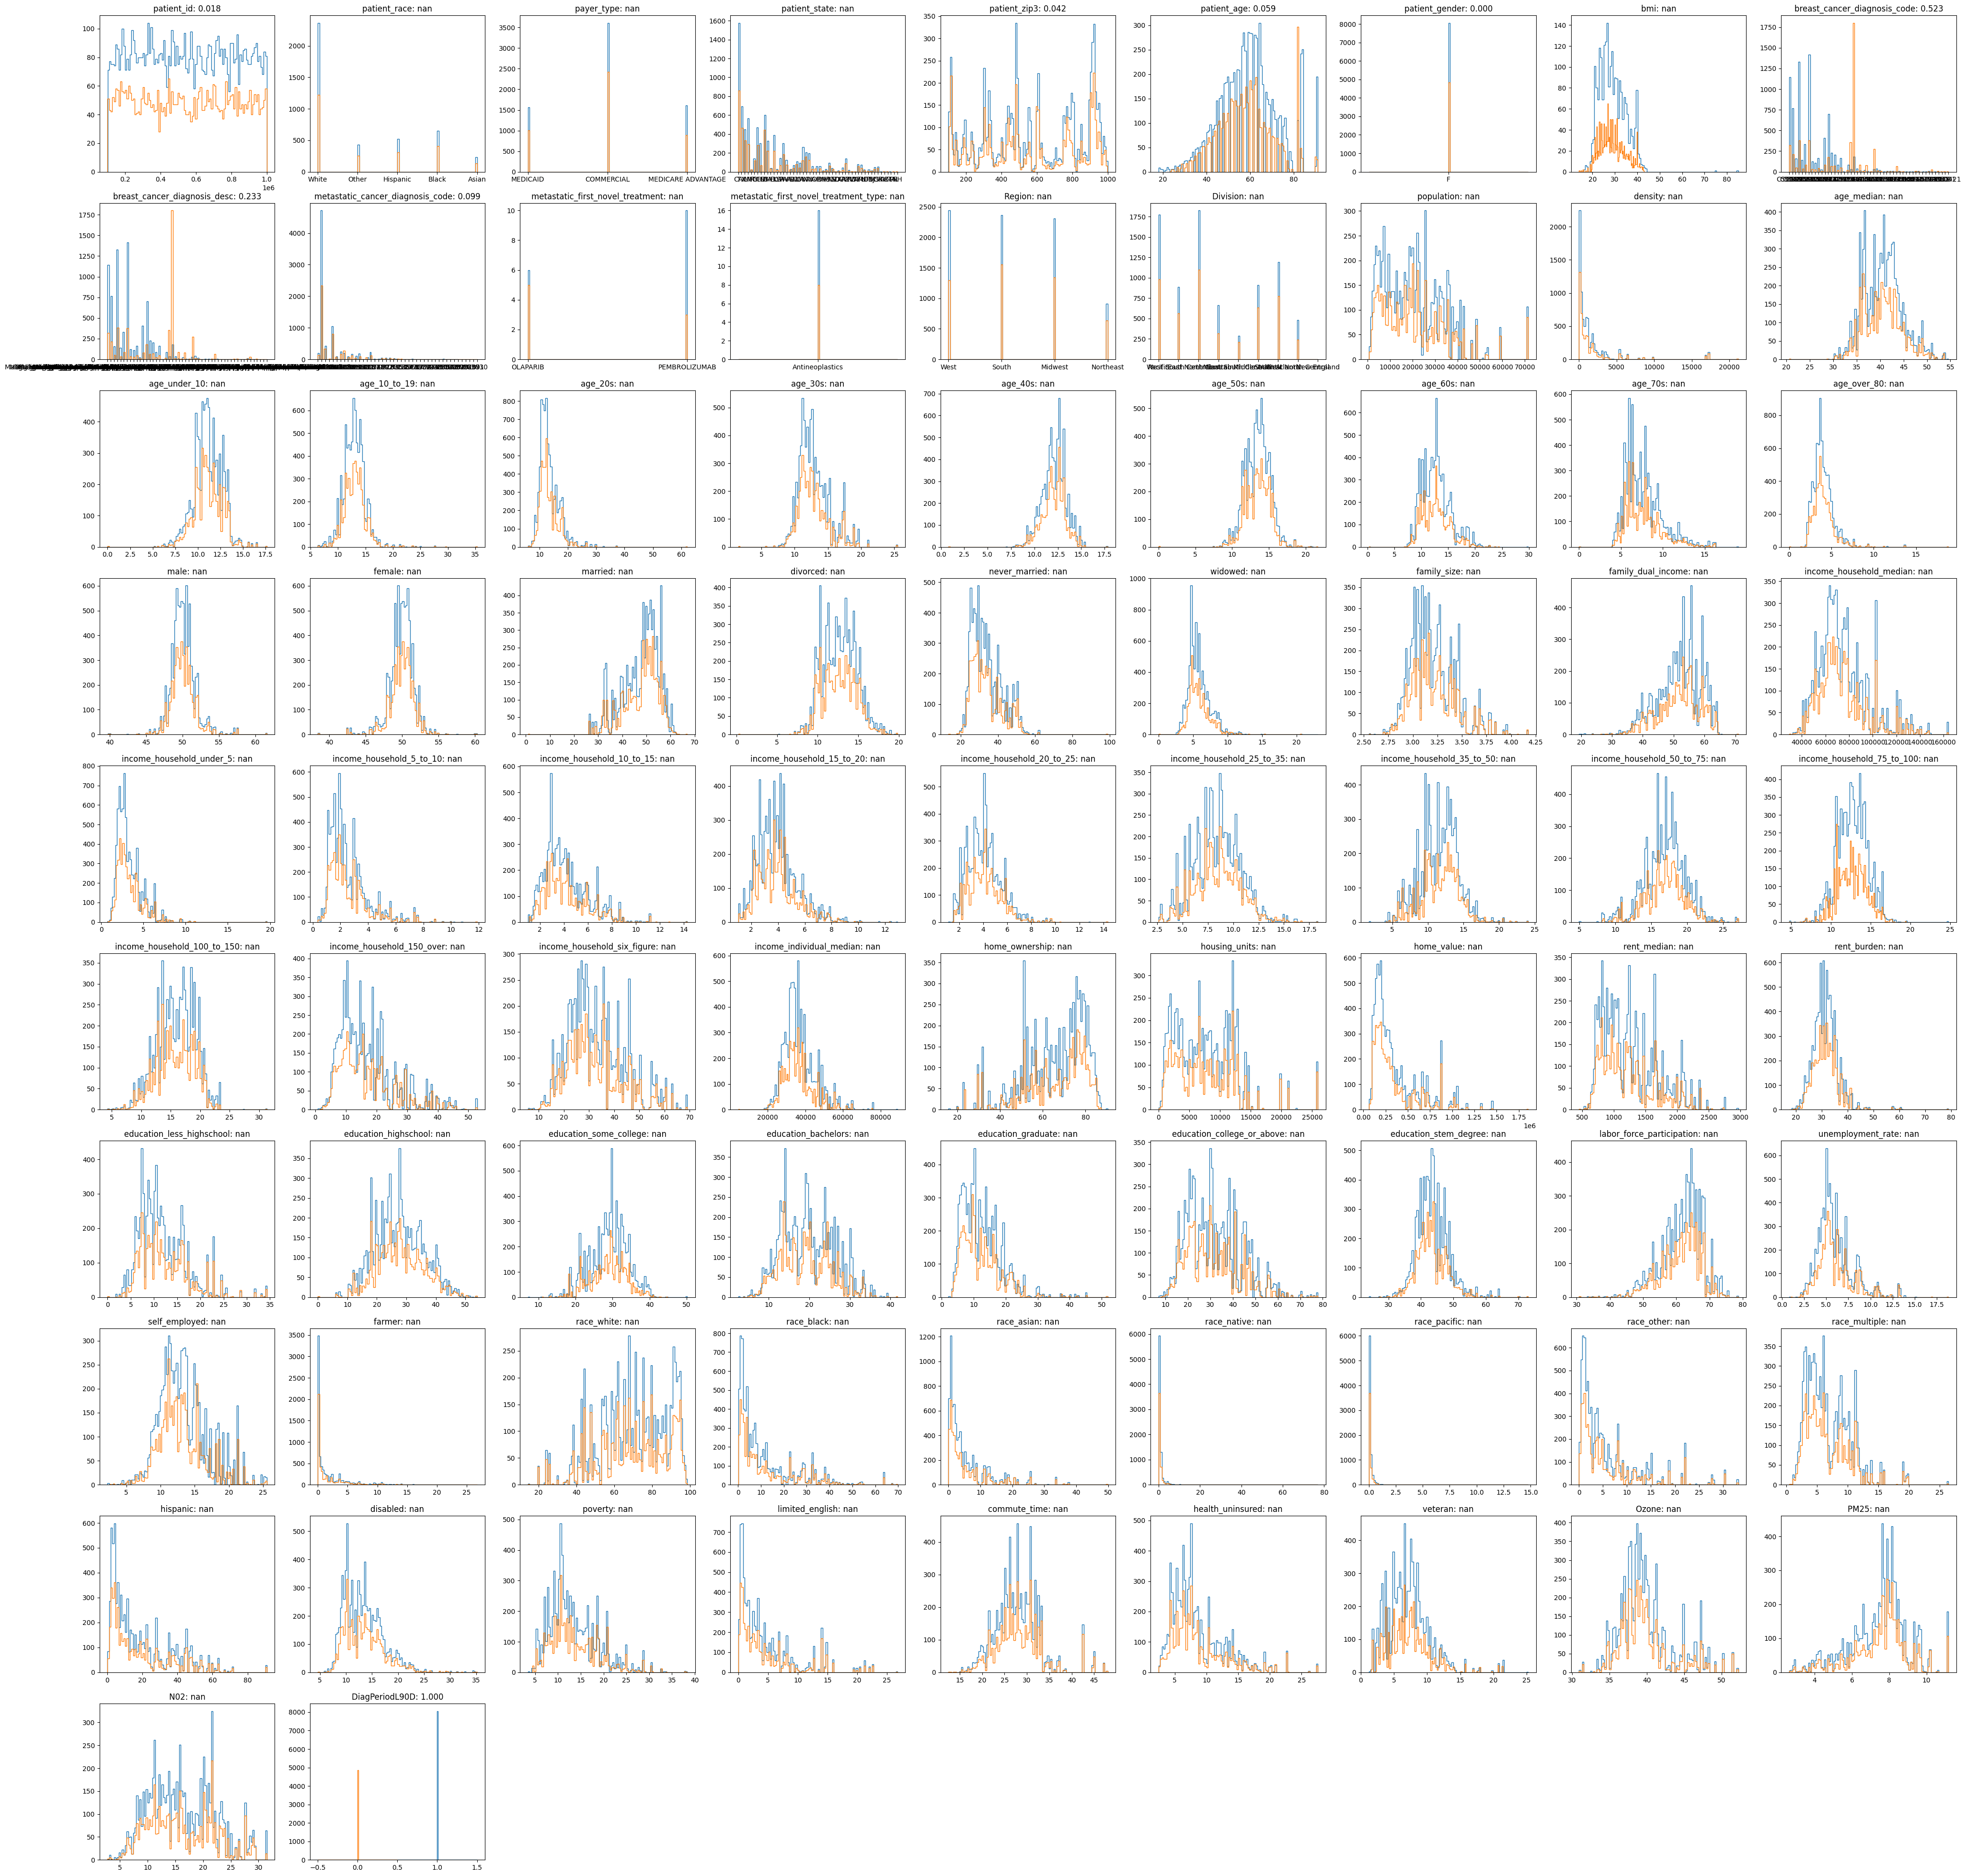

In [188]:
compare_features(TRAIN, 'DiagPeriodL90D', logscale=False)
#plt.savefig('pairplot.png')

In [218]:
# The most promising features appear to be: 'metastatic_cancer_diagnosis_code', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc'

## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [2]:
file='training.csv'
train=pd.read_csv(file)

file='test.csv'
test=pd.read_csv(file)

test['DiagPeriodL90D']=2
df=pd.concat([train,test])

keep=['DiagPeriodL90D', 'patient_state', 'patient_age', 'metastatic_cancer_diagnosis_code', 
      'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'patient_zip3']
# features to be used for training

df=df[keep]

# Combines the training and testing data sets for encoding
df

,DiagPeriodL90D,patient_state,patient_age,metastatic_cancer_diagnosis_code,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,patient_zip3
0,1,CA,84,C7989,C50919,Malignant neoplasm of unsp site of unspecified...,924
1,1,CA,62,C773,C50411,Malig neoplm of upper-outer quadrant of right ...,928
2,1,TX,43,C773,C50112,Malignant neoplasm of central portion of left ...,760
3,0,CA,45,C773,C50212,Malig neoplasm of upper-inner quadrant of left...,926
4,0,ID,55,C773,1749,"Malignant neoplasm of breast (female), unspeci...",836
...,...,...,...,...,...,...,...
5787,2,KY,63,C773,C50411,Malig neoplm of upper-outer quadrant of right ...,404
5788,2,IA,69,C773,C50912,Malignant neoplasm of unspecified site of left...,507
5789,2,WA,84,C773,C50411,Malig neoplm of upper-outer quadrant of right ...,980
5790,2,OK,58,C773,1749,"Malignant neoplasm of breast (female), unspeci...",740


In [3]:
df.isnull().sum()

DiagPeriodL90D                       0
patient_state                       72
patient_age                          0
metastatic_cancer_diagnosis_code     0
breast_cancer_diagnosis_code         0
breast_cancer_diagnosis_desc         0
patient_zip3                         0
dtype: int64

In [4]:
df['patient_state'].mode()

# patient_state is the only feature containing null values

0    CA
Name: patient_state, dtype: object

In [5]:
df['patient_state'].fillna('CA', inplace=True)
df.isnull().sum()

# replace the null values in patient_state with the mode

DiagPeriodL90D                      0
patient_state                       0
patient_age                         0
metastatic_cancer_diagnosis_code    0
breast_cancer_diagnosis_code        0
breast_cancer_diagnosis_desc        0
patient_zip3                        0
dtype: int64

In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encoder=OneHotEncoder()

cat_vars=['patient_state', 'metastatic_cancer_diagnosis_code', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc']
encoder.fit(df[cat_vars])

encoded=pd.DataFrame(encoder.transform(df[cat_vars]).toarray())
df=df.drop(columns=cat_vars)
df=df.reset_index().drop('index', axis=1)
df=pd.concat([df, encoded], axis=1)
df.columns=df.columns.astype(str)

# Uses OneHotEncoder to encode the categorical features of interest

In [7]:
df

,DiagPeriodL90D,patient_age,patient_zip3,0,1,2,3,4,5,6,...,187,188,189,190,191,192,193,194,195,196
0,1,84,924,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,62,928,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,43,760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,45,926,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,55,836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18693,2,63,404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18694,2,69,507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18695,2,84,980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18696,2,58,740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm to work. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.

### Apply ML to the challenge test set

* Once trained, apply the ML algorithm the the test dataset and generate the submission file.


In [8]:
train=df[df['DiagPeriodL90D']!=2]

# Separates the training data from the testing data

train_x=train[list(df.columns)[1:]][:6000]
train_y=train['DiagPeriodL90D'][:6000]

validation_x=train[list(df.columns)[1:]][6000:9500]
validation_y=train['DiagPeriodL90D'][6000:9500]

test_x=train[list(df.columns)[1:]][9500:]
test_y=train['DiagPeriodL90D'][9500:]

# Separates the training data into a training subset and a validation subset

## Neural Network

In [9]:
from sklearn.neural_network import MLPClassifier
clf_nn=clf = MLPClassifier(solver='adam', alpha=1e-7, hidden_layer_sizes=(7,7), random_state=1)

In [10]:
clf_nn.fit(train_x, train_y)

MLPClassifier(alpha=1e-07, hidden_layer_sizes=(7, 7), random_state=1)

In [98]:
predictions=clf_nn.predict_proba(train_x)[:, 1]
print('Accuracy Score with "predict":', accuracy_score(train_y, clf_nn.predict(train_x)))
print('Roc Auc Score with "predict_proba":', roc_auc_score(train_y, predictions))

# Scoring on the training set

Accuracy Score with "predict": 0.8105
Roc Auc Score with "predict_proba": 0.8111768888888888


In [99]:
predictions=clf_nn.predict_proba(validation_x)[:, 1]
print('Accuracy Score with "predict":', accuracy_score(validation_y, clf_nn.predict(validation_x)))
print('Roc Auc Score with "predict_proba":', roc_auc_score(validation_y, predictions))

# Scoring on the validation set

Accuracy Score with "predict": 0.8131428571428572
Roc Auc Score with "predict_proba": 0.7939341487009397


In [100]:
predictions=clf_nn.predict_proba(test_x)[:, 1]
print('Accuracy Score with "predict":', accuracy_score(test_y, clf_nn.predict(test_x)))
print('Roc Auc Score with "predict_proba":', roc_auc_score(test_y, predictions))

# Scoring on test set

Accuracy Score with "predict": 0.8103347034644744
Roc Auc Score with "predict_proba": 0.7905210339209006


## Boosted Tree

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc, precision_score, accuracy_score, recall_score, f1_score

In [54]:
def auc_scoring(estimator, X, y):
    predictions = estimator.predict_proba(X)[:, 1]
    return roc_auc_score(y, predictions)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME'],
    'estimator': [None, DecisionTreeClassifier(max_depth=3)]}

grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5, scoring=auc_scoring)
grid_search.fit(train_x, train_y)

print("Best parameters:", grid_search.best_params_)
print("Best  AUC score:", grid_search.best_score_)

# Note: Code sourced from user 'pax2m'
# searches for optimal parameters for a boosted tree algorithm

Best parameters: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.5, 'n_estimators': 200}
Best  AUC score: 0.7896092856317904


In [13]:
clf=AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(max_depth=3), learning_rate=1.0, n_estimators=200)

# Create an AdaBoost Classifier using a tree as an estimator

In [14]:
clf.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=200)

In [103]:
predictions=clf.predict_proba(train_x)[:, 1]
print('Accuracy Score with "predict":', accuracy_score(train_y, clf.predict(train_x)))
print('Roc Auc Score with "predict_proba":', roc_auc_score(train_y, predictions))

# Scoring on training set

Accuracy Score with "predict": 0.8113333333333334
Roc Auc Score with "predict_proba": 0.8165647407407407


In [104]:
predictions=clf.predict_proba(validation_x)[:, 1]
print('Accuracy Score with "predict":', accuracy_score(validation_y, clf.predict(validation_x)))
print('Roc Auc Score with "predict_proba":', roc_auc_score(validation_y, predictions))

# Scoring on validation set

Accuracy Score with "predict": 0.8134285714285714
Roc Auc Score with "predict_proba": 0.7968779367053622


In [105]:
predictions=clf.predict_proba(test_x)[:, 1]
print('Accuracy Score with "predict":', accuracy_score(test_y, clf.predict(test_x)))
print('Roc Auc Score with "predict_proba":', roc_auc_score(test_y, predictions))

# Scoring on test set

Accuracy Score with "predict": 0.8112155020551967
Roc Auc Score with "predict_proba": 0.7943878684639314


## Boosted Gradient

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'init': [None, clf]}

grid_search = GridSearchCV(GradientBoostingClassifier(max_depth=3), param_grid, cv=5, scoring=auc_scoring)
grid_search.fit(train_x, train_y)

print("Best parameters:", grid_search.best_params_)
print("Best  AUC score:", grid_search.best_score_)

# Searches for best parameters for a boosted gradient

Best parameters: {'init': None, 'learning_rate': 0.1, 'n_estimators': 50}
Best  AUC score: 0.7903791159995263


In [16]:
clf_gd=GradientBoostingClassifier(n_estimators=75, learning_rate=0.1, init=None, max_depth=3, random_state=0)

# creating a boosted gradient algorithm

In [17]:
clf_gd.fit(train_x, train_y)

GradientBoostingClassifier(n_estimators=75, random_state=0)

In [163]:
predictions=clf_gd.predict_proba(train_x)[:, 1]
print('Accuracy Score with "predict":', accuracy_score(train_y, clf_gd.predict(train_x)))
print('Roc Auc Score with "predict_proba":', roc_auc_score(train_y, predictions))

# Scoring on training set

Accuracy Score with "predict": 0.8131666666666667
Roc Auc Score with "predict_proba": 0.8229570370370372


In [164]:
predictions=clf_gd.predict_proba(validation_x)[:, 1]
print('Accuracy Score with "predict":', accuracy_score(validation_y, clf_gd.predict(validation_x)))
print('Roc Auc Score with "predict_proba":', roc_auc_score(validation_y, predictions))

# Scoring on validation set

Accuracy Score with "predict": 0.8128571428571428
Roc Auc Score with "predict_proba": 0.8016174336650083


In [165]:
predictions=clf_gd.predict_proba(test_x)[:, 1]
print('Accuracy Score with "predict":', accuracy_score(test_y, clf_gd.predict(test_x)))
print('Roc Auc Score with "predict_proba":', roc_auc_score(test_y, predictions))

# Scoring on test set

Accuracy Score with "predict": 0.8103347034644744
Roc Auc Score with "predict_proba": 0.7911324248259517


### ROC Curve Comparison

In [18]:
fpr_nn, tpr_nn, _ = roc_curve(test_y, clf_nn.predict_proba(test_x)[:,1])
fpr_ada, tpr_ada, _ = roc_curve(test_y, clf.predict_proba(test_x)[:,1])
fpr_gd, tpr_gd, _ = roc_curve(test_y, clf_gd.predict_proba(test_x)[:,1])

auc_nn=auc(fpr_nn, tpr_nn)
auc_ada=auc(fpr_ada, tpr_ada)
auc_gd=auc(fpr_gd, tpr_gd)

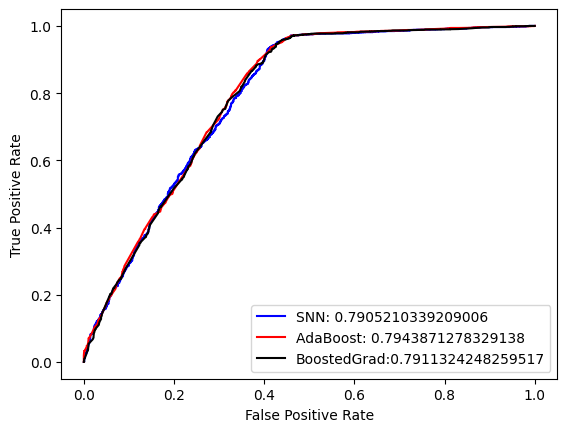

In [21]:
plt.plot(fpr_nn,tpr_nn,color='blue',label=f'SNN: {auc_nn}')
plt.plot(fpr_ada,tpr_ada,color='red',label=f'AdaBoost: {auc_ada}')
plt.plot(fpr_gd,tpr_gd,color='black',label=f'BoostedGrad:{auc_gd}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
#plt.savefig('ROC_comp.png')
plt.show()

## Kaggle Submission

In [166]:
test=df[df['DiagPeriodL90D']==2].drop('DiagPeriodL90D', axis=1)

preds=clf_gd.predict_proba(test)[:,1]
preds

array([0.79231115, 0.79932602, 0.79231115, ..., 0.83639535, 0.1186756 ,
       0.84660524])

In [167]:
submission=pd.read_csv('sample_submission.csv')
submission['DiagPeriodL90D']=preds
submission.head(3)

,patient_id,DiagPeriodL90D
0,573710,0.792311
1,593679,0.799326
2,184532,0.792311


In [168]:
submission.to_csv('kaggle_submission_.csv', index=False)

## Highest Private Score: 0.789
## Highest Public Score: 0.798